<a href="https://colab.research.google.com/github/rohan4b/Encheres/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loading data

In [ ]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot a,s plt
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split

In [1]:
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

NameError: ignored

In [ ]:
x = x.reshape(70000, 28, 28)

In [ ]:
x.shape, y.shape

((70000, 28, 28), (70000,))

# breaking into train and test

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [ ]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((56000, 28, 28), (14000, 28, 28), (56000,), (14000,))

# visualizing the distribution of training data

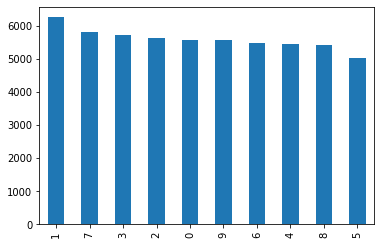

In [ ]:
pd.Series(train_y).value_counts().plot.bar()

# the classes are almost balanced i.e evenly distributed

# segregating as per the classes

In [ ]:
# making blocks of images for every class

data_dict = defaultdict(list)
for img, id in zip(train_x, train_y):
  data_dict[int(id)].append(img)

# calculating mean and standard deviation images (PART 1)

In [ ]:
def plotter(images=None):
  plt.subplot(121)
  plt.imshow(images[0].reshape(28,28))
  plt.subplot(122)
  plt.imshow(images[1].reshape(28,28))

class name : 0
mean image 			 std image


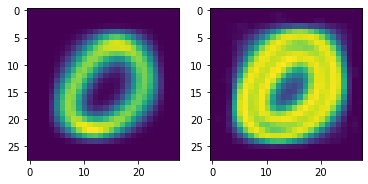

----------------------------------------------------------------------------------------------
class name : 1
mean image 			 std image


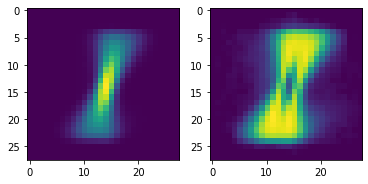

----------------------------------------------------------------------------------------------
class name : 2
mean image 			 std image


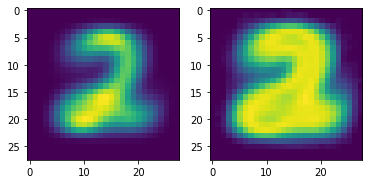

----------------------------------------------------------------------------------------------
class name : 3
mean image 			 std image


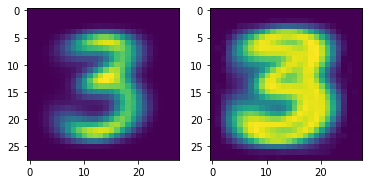

----------------------------------------------------------------------------------------------
class name : 4
mean image 			 std image


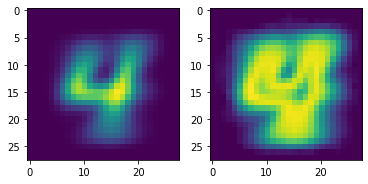

----------------------------------------------------------------------------------------------
class name : 5
mean image 			 std image


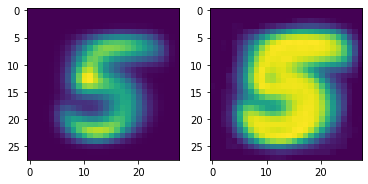

----------------------------------------------------------------------------------------------
class name : 6
mean image 			 std image


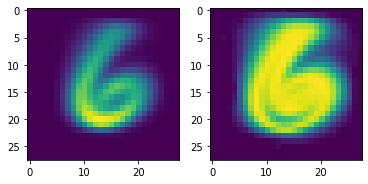

----------------------------------------------------------------------------------------------
class name : 7
mean image 			 std image


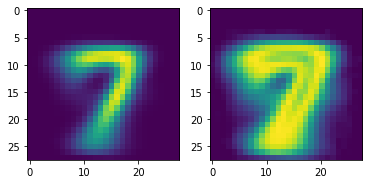

----------------------------------------------------------------------------------------------
class name : 8
mean image 			 std image


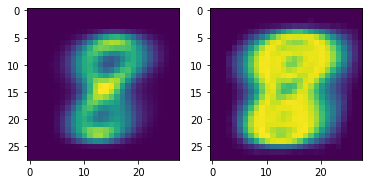

----------------------------------------------------------------------------------------------
class name : 9
mean image 			 std image


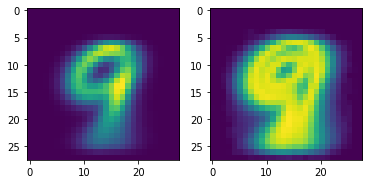

----------------------------------------------------------------------------------------------


In [ ]:
mean_std_dict = {}
for id in range(10):
  print('class name :', id)
  blank_img = np.zeros((28, 28))
  for each_img in data_dict[id]:
    for r in range(len(each_img)):
      for c in range(len(each_img)):
        blank_img[r][c] += each_img[r][c]

  mean_img = blank_img / len(data_dict[id])     # mean = sum(X)/N
                                                # var = sum((x[i] - x')**2)/N
  blank_img = np.zeros((28, 28))
  for each_img in data_dict[id]:
    for r in range(len(each_img)):
      for c in range(len(each_img)):
        blank_img[r][c] += (each_img[r][c] - mean_img[r][c])**2     
  
  var_img = blank_img / len(data_dict[id])
  std_img = np.sqrt(var_img)                  # std = root(var)  
  mean_std_dict[id] = [mean_img, std_img]
  print('mean image \t\t\t std image')
  plotter([mean_img, std_img])
  plt.show()
  print('----------------------------------------------------------------------------------------------')

# discriminant calculation (PART 2)

In [ ]:
def discriminant(test_img):
  sum_val = 10**10
  closest_class = -1
  for id in mean_std_dict:
    mean_class_img, std_class_img = mean_std_dict[id]

    # calculating difference in mean pattern and test pattern
    mean_diff = np.abs(test_img - mean_class_img)
    # difference between standard_deviation and difference between test and mean pattern
    std_diff = np.abs(mean_diff - std_class_img)

    # low value represents less noise, which could only happen if the test image almost coincides with general class mean and deviation
    curr_sum = np.sum(std_diff)

    if sum_val > curr_sum:
      sum_val = curr_sum
      closest_class = id
  return closest_class

In [ ]:
predictions = []
for i in range(len(test_x)):
  pred = discriminant(test_x[i])
  predictions.append(str(pred))

# metrics

In [ ]:
def accuracy_per_class(preds, tests):
  res_dict = {str(k):[0, 0] for k in range(0, 10)}
  for p, t in zip(preds, tests):
    if t == p:
      res_dict[t][0] += 1
    res_dict[t][1] += 1
  print('class\t \t accuracy')
  for r in res_dict:
    print(r, '\t->\t', res_dict[r][0]/ res_dict[r][1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

print('Accurcay per class')
accuracy_per_class(predictions, test_y)

print('\n----------------------------------\n')

print('Total accuracy score :', accuracy_score(predictions, test_y))

print('\n----------------------------------\n')

print('Confusion_matrix')
print(confusion_matrix(predictions, test_y))

print('\n----------------------------------\n')
print('Metric per class')
precision, recall, fscore, support = score(test_y, predictions)

print("\tprecision   recall  \tfscore\t     support")
for i in range(10):
  print(i, '->\t', f'{str(precision[i])[:4]} \t   {str(recall[i])[:4]} \t   {str(fscore[i])[:4]} \t   {str(support[i])[:4]}')

Accurcay per class
class	 	 accuracy
0 	->	 0.9375951293759512
1 	->	 0.9795792079207921
2 	->	 0.5457875457875457
3 	->	 0.4912526242127362
4 	->	 0.16569343065693432
5 	->	 0.3262411347517731
6 	->	 0.8911174785100286
7 	->	 0.3674863387978142
8 	->	 0.8246753246753247
9 	->	 0.8245866283249461

----------------------------------

Total accuracy score : 0.6410714285714286

----------------------------------

Confusion_matrix
[[1232    1   84   60   28  157   51   40   20   33]
 [   2 1583  123  137   69  127   60  134  161   97]
 [   2    0  745   35    3    4    4    6    3    3]
 [   0    0   11  702    0   36    0    2   10    4]
 [   0    0    1    0  227    0    0    0    0    3]
 [  12    0    6   38   13  414    3    8    6    2]
 [  20    6  157   26   86   44 1244    2   11    2]
 [   0    0    1    3    1    0    0  538    1    2]
 [  38   25  222  398  176  435   34  107 1143   98]
 [   8    1   15   30  767   52    0  627   31 1147]]

----------------------------------

M

In [ ]:
'''
# there are certain disadvantages of bayseian method for pattern recognition which makes it less efficient than other methods. They are : 

  1.The main limitation of Naive Bayes is the assumption of independent predictor features. 
    Naive Bayes implicitly assumes that all the attributes are mutually independent. 
    In real life, it’s almost impossible that we get a set of predictors that are completely independent or one another.

  2.If a categorical variable has a category in the test dataset, which was not observed in training dataset,
    then the model will assign a 0 (zero) probability and will be unable to make a prediction.
    This is often known as Zero Frequency. To solve this, we can use a smoothing technique.
    
'''